In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import distinctipy


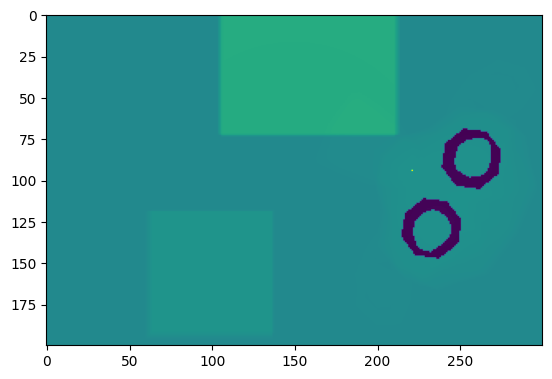

In [6]:
density = np.load('density0.npy')
plt.imshow(density)

In [473]:
facing = np.load("facing.npy")
print(facing.shape)
print(np.unique(facing, return_counts=True))
print(f"min: {facing.min()}, max: {facing.max()}")
facing

(60000, 32)
(array([-1,  0,  1], dtype=int8), array([  28806, 1862388,   28806]))
min: -1, max: 1


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [474]:
alphas = np.load("alphas.npy")
print(alphas.shape)
print(np.unique(alphas, return_counts=True))
print(f"min: {alphas.min()}, max: {alphas.max()}")
alphas[alphas == np.inf] = np.nan
alphas

(60000, 32)
(array([487.8176 , 487.834  , 487.83408, ..., 926.47656, 926.50366,
             inf], dtype=float32), array([      1,       1,       1, ...,       1,       1, 1862388]))
min: 487.8175964355469, max: inf


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [475]:
for i in range(alphas.shape[0]):
    x = alphas[i]
    x = x[~np.isnan(x)]
    if len(np.unique(x)) != len(x):
        print(i, np.unique(x), x)
        

In [476]:
a, b = np.unique(alphas, axis=0, return_counts=True)

b

array([1, 1, 1, ..., 1, 1, 1])

In [477]:
alphas[:,0]

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [478]:
facings = facing
facings = facings.swapaxes(0, 1)
facings = facings.reshape((-1, 200, 300))
facings.shape

(32, 200, 300)

In [479]:
layers = alphas
layers = layers.swapaxes(0, 1)
layers = layers.reshape((-1, 200, 300))
layers.shape

(32, 200, 300)

In [480]:
# layers = np.load("peeledlayers.npy")
# print(layers.shape)

In [481]:
# orderedlayers = np.concatenate([layers[0::4], np.flip(layers[1::4], 0), layers[2::4], np.flip(layers[3::4], 0)], axis=0)

zfar = np.min(orderedlayers)
zfar


-2040.0

In [482]:
print(layers[0].shape)
a = list(layers[0].shape)
# a = list(reversed(list(layers[0].shape)))
indices = np.array(list(np.ndindex(tuple(a))))
allims = [np.concatenate([indices, layers[i].flatten()[:,None], i*np.ones(shape=(indices.shape[0]))[:,None], facings[i].flatten()[:,None]], axis=1) for i in range(layers.shape[0])]
allims = np.concatenate(allims, axis=0)

where = np.where(np.logical_and(allims[:,2] > -np.inf, allims[:,2] < np.inf))
# where = np.where(np.logical_and(allims[:,2] > zfar+1, allims[:,2] < -zfar-1))
allims = allims[where] 
allims[:,:2] *= 0.5

(200, 300)


In [483]:
df = pd.DataFrame(allims, columns=["x", "y", "z", "i", "facing"])
df["i"] = df["i"].astype(int)
df

,x,y,z,i,facing
0,2.0,30.0,886.616089,0,1.0
1,2.0,30.5,886.588928,0,1.0
2,2.0,31.0,886.562073,0,1.0
3,2.0,31.5,886.535583,0,1.0
4,2.0,32.0,886.509338,0,1.0
...,...,...,...,...,...
57607,71.0,131.0,512.566589,5,-1.0
57608,71.0,131.5,512.507385,5,-1.0
57609,71.0,132.0,512.536255,5,-1.0
57610,71.0,132.5,512.663513,5,-1.0


In [488]:
def random_color():
    return np.random.randint(0, 255, size=3)

colors = distinctipy.get_colors(orderedlayers.shape[0])


# for i in range(orderedlayers.shape[0]):
#     col = colors[i]
#     df.loc[df["i"] == i, "red"] = col[0]*255
#     df.loc[df["i"] == i, "green"] = col[1]*255
#     df.loc[df["i"] == i, "blue"] = col[2]*255
df["red"] = 0
df["green"] = 0
df["blue"] = 0
df.loc[df["facing"] == -1, "red"] = 255
df.loc[df["facing"] == 1, "green"] = 255

In [489]:
from pyntcloud import PyntCloud
import numpy as np
import pandas as pd
from pyntcloud import PyntCloud

cloud = PyntCloud(df)

cloud.plot(backend="pythreejs", initial_point_size=1)

/home/pelvisvr/mambaforge/envs/deepdrr-dev/lib/python3.8/site-packages/pythreejs/traits.py:257: UserWarning: 64-bit data types not supported for WebGL data, casting to 32-bit.
  warnings.warn('64-bit data types not supported for WebGL '


Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(51.25539818093453, 241.56224397694925, 2015.…